In [1]:
import pandas as pd
import numpy as np
import os
from nibabel.testing import data_path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Import the data
dataPath = '/home/jovyan/shared/NSD/nsddata/ppdata/subj01/behav/responses.tsv'
nsdBehav = pd.read_csv(dataPath, sep='\t')

In [3]:
nsdBehav

,SUBJECT,SESSION,RUN,TRIAL,73KID,10KID,TIME,ISOLD,ISCORRECT,RT,CHANGEMIND,MEMORYRECENT,MEMORYFIRST,ISOLDCURRENT,ISCORRECTCURRENT,TOTAL1,TOTAL2,BUTTON,MISSINGDATA
0,1,1,1,1,46003,626,0.505082,0,1.0,803.529781,0.0,NaN,NaN,0,1.0,1,0,1.0,0
1,1,1,1,2,61883,5013,0.505128,0,1.0,972.261383,0.0,NaN,NaN,0,1.0,1,0,1.0,0
2,1,1,1,3,829,4850,0.505175,0,1.0,742.351236,0.0,NaN,NaN,0,1.0,1,0,1.0,0
3,1,1,1,4,67574,8823,0.505221,0,1.0,747.518479,0.0,NaN,NaN,0,1.0,1,0,1.0,0
4,1,1,1,5,16021,9538,0.505267,0,1.0,547.422774,0.0,NaN,NaN,0,1.0,1,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,40,12,58,13774,8984,262.629551,1,0.0,1275.300175,0.0,20963.0,21540.0,0,1.0,1,0,1.0,0
29996,1,40,12,59,66768,6026,262.629597,1,1.0,661.379768,0.0,16.0,17622.0,1,1.0,0,1,2.0,0
29997,1,40,12,60,53168,4841,262.629644,1,1.0,786.811781,0.0,9483.0,11912.0,0,0.0,0,1,2.0,0
29998,1,40,12,61,1944,7323,262.629690,1,1.0,502.626801,0.0,83.0,12162.0,1,1.0,0,1,2.0,0


In [4]:
nsdBehav["SigDetection"] = pd.NA
nsdBehav["SigDetection"]

# 0: HIT; # 1: MISS; # 2: CORRECT REJECTION; # 3: FALSE ALARM; # 4: NO RESPONSE
nsdBehav.loc[((nsdBehav["ISOLD"] == 1) & (nsdBehav["ISCORRECT"] == 1)), "SigDetection"] = 0
nsdBehav.loc[((nsdBehav["ISOLD"] == 1) & (nsdBehav["ISCORRECT"] == 0)), "SigDetection"] = 1
nsdBehav.loc[((nsdBehav["ISOLD"] == 0) & (nsdBehav["ISCORRECT"] == 1)), "SigDetection"] = 2
nsdBehav.loc[((nsdBehav["ISOLD"] == 0) & (nsdBehav["ISCORRECT"] == 0)), "SigDetection"] = 3
nsdBehav.loc[(pd.isna(nsdBehav["BUTTON"])), "SigDetection"] = 4

In [5]:
# get rid of the behavioral data corresponding to the last 3 held out runs
nsdBehav = nsdBehav[(nsdBehav["SESSION"] <= 37)]
nsdBehav

,SUBJECT,SESSION,RUN,TRIAL,73KID,10KID,TIME,ISOLD,ISCORRECT,RT,CHANGEMIND,MEMORYRECENT,MEMORYFIRST,ISOLDCURRENT,ISCORRECTCURRENT,TOTAL1,TOTAL2,BUTTON,MISSINGDATA,SigDetection
0,1,1,1,1,46003,626,0.505082,0,1.0,803.529781,0.0,NaN,NaN,0,1.0,1,0,1.0,0,2
1,1,1,1,2,61883,5013,0.505128,0,1.0,972.261383,0.0,NaN,NaN,0,1.0,1,0,1.0,0,2
2,1,1,1,3,829,4850,0.505175,0,1.0,742.351236,0.0,NaN,NaN,0,1.0,1,0,1.0,0,2
3,1,1,1,4,67574,8823,0.505221,0,1.0,747.518479,0.0,NaN,NaN,0,1.0,1,0,1.0,0,2
4,1,1,1,5,16021,9538,0.505267,0,1.0,547.422774,0.0,NaN,NaN,0,1.0,1,0,1.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27745,1,37,12,58,16201,1257,246.729582,1,1.0,575.265219,0.0,37.0,167.0,1,1.0,0,1,2.0,0,0
27746,1,37,12,59,55611,7495,246.729629,1,1.0,1664.749701,0.0,3119.0,5135.0,0,0.0,0,1,2.0,0,0
27747,1,37,12,60,69912,1190,246.729675,1,0.0,1775.520753,0.0,23762.0,NaN,0,1.0,1,0,1.0,0,1
27748,1,37,12,61,67262,5181,246.729721,1,1.0,517.624946,0.0,135.0,3469.0,1,1.0,0,1,2.0,0,0


In [6]:
nsdBehav.to_csv("derivatives/s01_signalDetectionData", sep = '\t')

In [7]:
## Visualizing the data

In [8]:
# set up a color palette from:
# Wong, B. (2011). Points of view: Color blindness. Nature Methods, 
# 8(6), 441–441. https://doi.org/10.1038/nmeth.1618

cbPalette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", 
             "#999999", "#777777", "#555555", "#333333", "#000000"]
cbLabels = ['orange', 'skyblue', 'green', 'yellow', 'blue', 'vermillion', 'pink', 
                      'lightgray', 'gray', 'darkgray', 'charcoal', 'black']
sns.set_palette(sns.color_palette(cbPalette))


In [9]:
np.count_nonzero(nsdBehav["SigDetection"])

14208

[Text(0, 0, '13542'),
 Text(0, 0, '4363'),
 Text(0, 0, '7346'),
 Text(0, 0, '2488'),
 Text(0, 0, '11')]

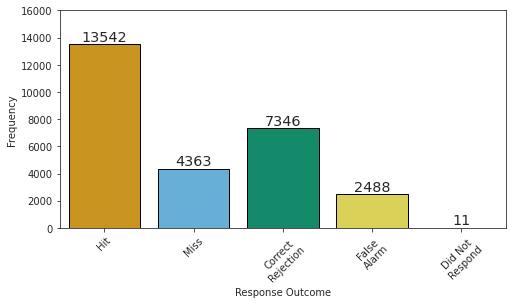

In [10]:
# Count data for each resopnse outcome
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(8,4))
sns.set(font_scale=1.2)
ax = sns.countplot(x="SigDetection", data=nsdBehav, palette = cbPalette, edgecolor = "black")
#ax = sns.barplot(x="SigDetection",y="SUBJECT",data = nsdBehav_summary)
ax.set(xlabel = "Response Outcome", ylabel = "Frequency")
ax.set_xticklabels(["Hit", "Miss", "Correct\nRejection", "False\nAlarm", "Did Not\nRespond"],rotation = 45)
ax.set_ylim(0, 16000)
ax.bar_label(ax.containers[0])



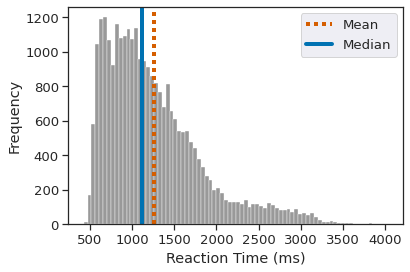

In [11]:
# Distribution of reaction time
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(6,4))
sns.set(font_scale=1.2)
sns.set_palette(sns.color_palette(cbPalette))
ax = sns.histplot(x="RT", data=nsdBehav, color = cbPalette[8])
ax.set(xlabel = "Reaction Time (ms)", ylabel = "Frequency")
ax.axvline(np.nanmean(nsdBehav["RT"]), color = cbPalette[5], linewidth = 4, linestyle=(0,(1,1)))
ax.axvline(np.nanmedian(nsdBehav["RT"]), color = cbPalette[4], linewidth = 4)
plt.legend(title='', loc='upper right', labels=['Mean', 'Median'])
# NOTE: the RT data appear to be non-normally distributed

[Text(0, 0, 'Hit'),
 Text(1, 0, 'Miss'),
 Text(2, 0, 'Correct\nRejection'),
 Text(3, 0, 'False\nAlarm'),
 Text(4, 0, 'Did Not\nRespond')]

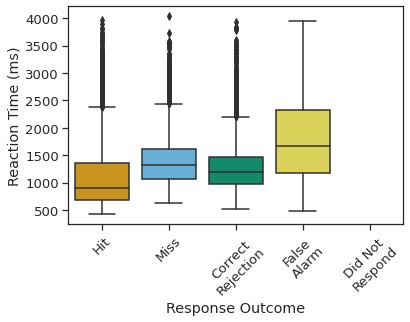

In [12]:
# Reaction time box plots
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(6,4))
sns.set(font_scale=1.2)
sns.set_palette(sns.color_palette(cbPalette))
sns.set(font_scale=1.2)
sns.set_palette(sns.color_palette(cbPalette))
ax = sns.boxplot(x="SigDetection", y="RT", data = nsdBehav)
#ax = sns.barplot(x="SigDetection", y="RT", data=nsdBehav, estimator=np.median, ci=100, capsize=0, errwidth = 2, linewidth = 2)
ax.set(xlabel = "Response Outcome", ylabel = "Reaction Time (ms)")
ax.set_xticklabels(["Hit", "Miss", "Correct\nRejection", "False\nAlarm", "Did Not\nRespond"],
                   rotation = 45)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


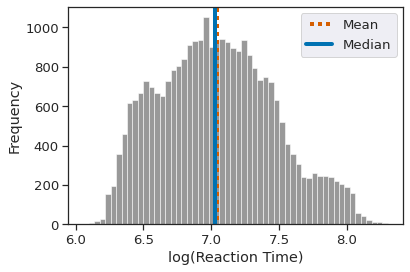

In [13]:
# Log transform to try and normalize RT
nsdBehav["logRT"] = np.log(nsdBehav["RT"])
# Distribution of log-transformed reaction time
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(6,4))
sns.set(font_scale=1.2)
sns.set_palette(sns.color_palette(cbPalette))
ax = sns.histplot(x="logRT", data=nsdBehav, color = cbPalette[8])
ax.set(xlabel = "log(Reaction Time)", ylabel = "Frequency")
ax.axvline(np.nanmean(nsdBehav["logRT"]), color = cbPalette[5], linewidth = 4, linestyle=(1,(1,1)))
ax.axvline(np.nanmedian(nsdBehav["logRT"]), color = cbPalette[4], linewidth = 4)
plt.legend(title='', loc='upper right', labels=['Mean', 'Median'])

[Text(0, 0, 'Hit'),
 Text(1, 0, 'Miss'),
 Text(2, 0, 'Correct\nRejection'),
 Text(3, 0, 'False\nAlarm'),
 Text(4, 0, 'Did Not\nRespond')]

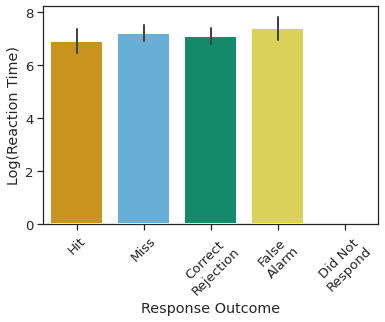

In [14]:
# Reaction time bar plots
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(6,4))
sns.set(font_scale=1.2)
sns.set_palette(sns.color_palette(cbPalette))
ax = sns.barplot(x="SigDetection", y="logRT", data=nsdBehav, estimator=np.nanmean, ci="sd", capsize=0, errwidth = 2, linewidth = 2)
ax.set(xlabel = "Response Outcome", ylabel = "Log(Reaction Time)")
ax.set_xticklabels(["Hit", "Miss", "Correct\nRejection", "False\nAlarm", "Did Not\nRespond"],
                   rotation = 45)
## NOTE: Error bars represent standard deviation of the mean

In [15]:
## ROC using s01 sessions for data points

In [16]:
## All subs

In [17]:
## Find all the data
allPath = '/home/jovyan/shared/NSD/nsddata/ppdata/'
subjs = next(os.walk(allPath))[1]
subjs


['subj01',
 'subj02',
 'subj03',
 'subj04',
 'subj05',
 'subj06',
 'subj07',
 'subj08']

In [18]:
# Load all the data
subData = []
for isubj in subjs:
    tmpData = pd.read_csv(os.path.join(allPath, isubj, "behav/responses.tsv"), sep = "\t")
    subData.append(tmpData)

nsdAll = pd.concat(subData)
    

In [19]:
nsdAll["SigDetection"] = pd.NA
nsdAll["SigDetection"]

# 0: HIT; # 1: MISS; # 2: CORRECT REJECTION; # 3: FALSE ALARM; # 4: NO RESPONSE
nsdAll.loc[((nsdAll["ISOLD"] == 1) & (nsdAll["ISCORRECT"] == 1)), "SigDetection"] = 0
nsdAll.loc[((nsdAll["ISOLD"] == 1) & (nsdAll["ISCORRECT"] == 0)), "SigDetection"] = 1
nsdAll.loc[((nsdAll["ISOLD"] == 0) & (nsdAll["ISCORRECT"] == 1)), "SigDetection"] = 2
nsdAll.loc[((nsdAll["ISOLD"] == 0) & (nsdAll["ISCORRECT"] == 0)), "SigDetection"] = 3
nsdAll.loc[(pd.isna(nsdAll["BUTTON"])), "SigDetection"] = 4

# Remove the held out scan data from the NSD website (38-40)
nsdAll = nsdAll[(nsdAll["SESSION"] <= 37)]

# Save the file with all subject data
nsdAll.to_csv("derivatives/allSubs_signalDetectionData", sep = '\t')

In [20]:
nsdAll

,SUBJECT,SESSION,RUN,TRIAL,73KID,10KID,TIME,ISOLD,ISCORRECT,RT,CHANGEMIND,MEMORYRECENT,MEMORYFIRST,ISOLDCURRENT,ISCORRECTCURRENT,TOTAL1,TOTAL2,BUTTON,MISSINGDATA,SigDetection
0,1,1,1,1,46003,626,0.505082,0,1.0,803.529781,0.0,NaN,NaN,0,1.0,1.0,0.0,1.0,0,2
1,1,1,1,2,61883,5013,0.505128,0,1.0,972.261383,0.0,NaN,NaN,0,1.0,1.0,0.0,1.0,0,2
2,1,1,1,3,829,4850,0.505175,0,1.0,742.351236,0.0,NaN,NaN,0,1.0,1.0,0.0,1.0,0,2
3,1,1,1,4,67574,8823,0.505221,0,1.0,747.518479,0.0,NaN,NaN,0,1.0,1.0,0.0,1.0,0,2
4,1,1,1,5,16021,9538,0.505267,0,1.0,547.422774,0.0,NaN,NaN,0,1.0,1.0,0.0,1.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,8,30,12,58,1870,1686,286.796417,0,0.0,593.879198,0.0,NaN,NaN,0,0.0,0.0,1.0,2.0,0,3
22496,8,30,12,59,57428,8216,286.796464,1,1.0,403.097390,0.0,10625.0,22085.0,0,0.0,0.0,1.0,2.0,0,0
22497,8,30,12,60,54394,7261,286.796510,1,1.0,668.562626,0.0,2259.0,2422.0,0,0.0,0.0,1.0,2.0,0,0
22498,8,30,12,61,30,3191,286.796556,1,1.0,702.484654,0.0,20989.0,NaN,0,0.0,0.0,1.0,2.0,0,0


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


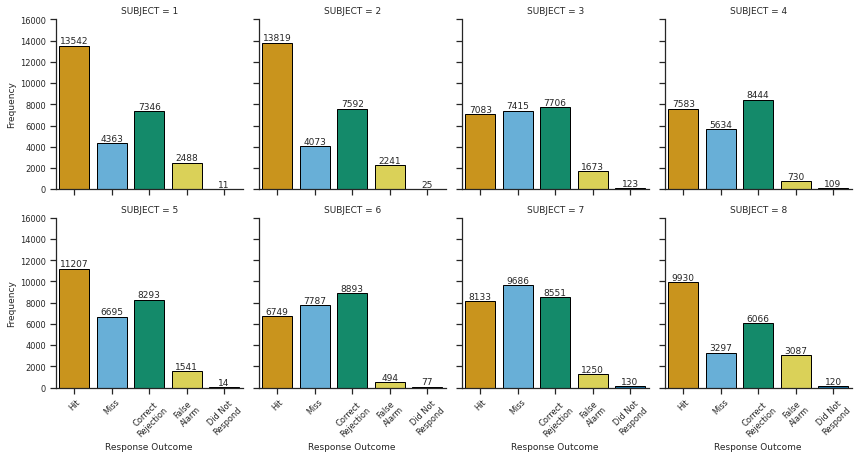

In [21]:

sns.set(font_scale=0.75)
sns.set_palette(sns.color_palette(cbPalette))
sns.set_style("ticks")
g = sns.FacetGrid(data=nsdAll, col = "SUBJECT", col_wrap=4, ylim=(0,16000))
g.map(sns.countplot, "SigDetection", palette=cbPalette, edgecolor = "black")    
g.set(xlabel = "Response Outcome", ylabel = "Frequency")
g.set_xticklabels(["Hit", "Miss", "Correct\nRejection", "False\nAlarm", "Did Not\nRespond"],rotation = 45)
for ax in g.axes:
    ax.bar_label(ax.containers[0])

In [22]:
# all subject ROC curve
nsdSubCounts = nsdAll.groupby(["SUBJECT", "ISOLD"])["ISCORRECT"].agg(['sum', 'size'])
nsdSubCounts["rate"] = (nsdSubCounts["sum"] / nsdSubCounts["size"])
nsdSubCounts = nsdSubCounts.unstack(1).loc[:,"rate"].add_prefix("rate").reset_index()
nsdSubCounts

ISOLD,SUBJECT,rate0,rate1
0,1,0.746469,0.756156
1,2,0.771466,0.771623
2,3,0.818829,0.485503
3,4,0.916929,0.570536
4,5,0.842699,0.625775
5,6,0.944958,0.462609
6,7,0.868916,0.454129
7,8,0.658703,0.747122


In [23]:
nsdSubCounts["rate0"] = 1 - nsdSubCounts["rate0"]
nsdSubCounts

ISOLD,SUBJECT,rate0,rate1
0,1,0.253531,0.756156
1,2,0.228534,0.771623
2,3,0.181171,0.485503
3,4,0.083071,0.570536
4,5,0.157301,0.625775
5,6,0.055042,0.462609
6,7,0.131084,0.454129
7,8,0.341297,0.747122


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

nsdAllroc = nsdAll.query("SigDetection != 4")
nsdAllroc

X = np.array(nsdAllroc[["SUBJECT", "ISOLD"]])
y = np.array(nsdAllroc["BUTTON"] - 1)

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

# #instantiate the model
log_regression = LogisticRegression()

# #fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

(0.0, 1.0)

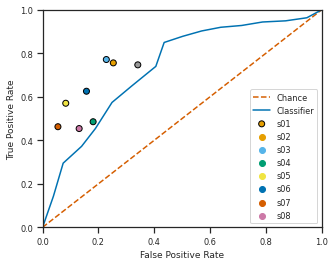

In [25]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve

fig, ax = plt.subplots(figsize=(5,4))

sns.set_style("ticks")

ax = sns.scatterplot(data = nsdSubCounts, x = nsdSubCounts["rate0"], y = nsdSubCounts["rate1"],
                    linewidth = 1, edgecolor = "black",
                    hue = sns.color_palette("Set2")[0:8], legend = "full")
sns.set_palette(sns.color_palette(cbPalette))
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = cbPalette[5], linestyle = "--")
plt.plot(fpr,tpr, color = cbPalette[4])
ax.set(xlabel = "False Positive Rate", ylabel = "Hit Rate")
plt.legend(labels = ["Chance", "Classifier", "s01", "s02", "s03", "s04", "s05", "s06", "s07", "s08"], 
           loc = "lower right")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim(0, 1)
plt.ylim(0, 1)
